<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales profundas (DNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [3]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

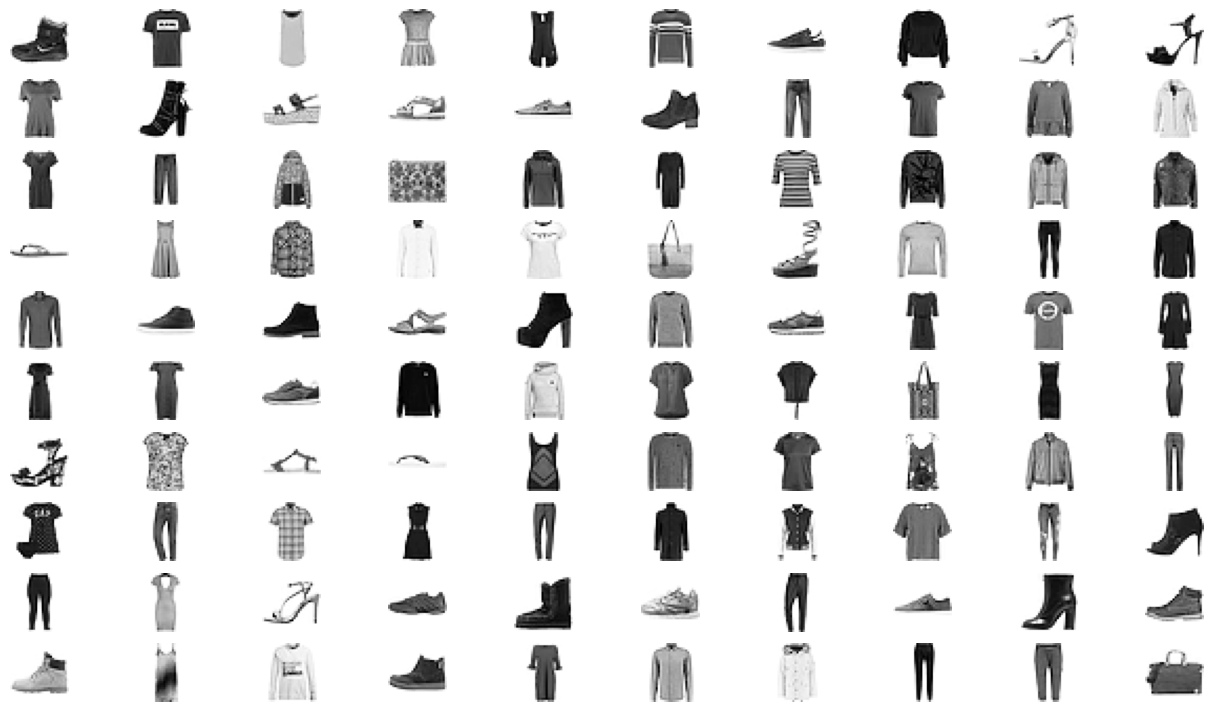

In [4]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

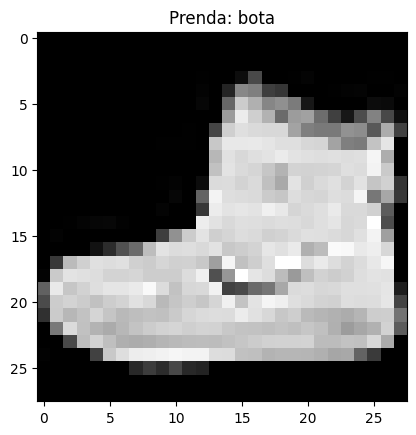

In [5]:
# Alumno, dibuje la primera imagen y su correspondiente categoria

plt.imshow(data_X_train[0], cmap='gray')

plt.title('Prenda: ' + str(category_list[data_y_train[0]]))

plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [6]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)

print(data_X_train[0][14,:])

[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


In [7]:
# Alumno: Normalizar los datos entre 0 y 1
data_X_norm = data_X_train / 255
data_X_test_norm = data_X_test / 255

In [8]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)
data_X_norm.shape[0]

60000

In [9]:
# Alumno: Imprimir la dimension de la imagen
data_X_norm[0].shape

(28, 28)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

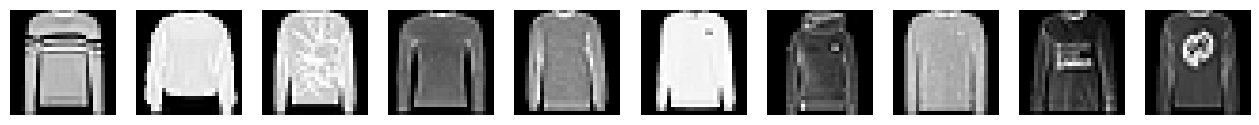

In [10]:
# Alumno: Explorar los primeros diez puloveres del dataset de train
fig = plt.figure(figsize=(16,9))

j=0

for i in range(10):

  ax = fig.add_subplot(1, 10, i+1)
  ax.axis('off')

  while True:
    if category_list[data_y_train[j]] == 'pulover':
      ax.imshow(data_X_train[j], cmap='gray')
      j+=1
      break
    j+=1
plt.show()

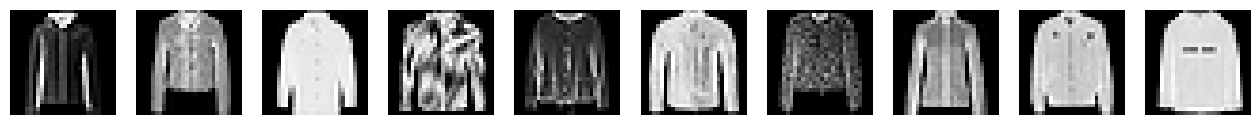

In [11]:
# Alumno: Explorar los primeros diez sacos del dataset de train
fig = plt.figure(figsize=(16,9))

j=0

for i in range(10):
  ax = fig.add_subplot(1, 10, i+1)
  ax.axis('off')

  while True:
    if category_list[data_y_test[j]] == 'saco':
      ax = ax.imshow(data_X_test[j], cmap='gray')
      j+=1
      break
    j+=1
plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [12]:
# Alumno: Transformar el espacio de variable 28x28 a un vector de 784
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension
flatten = data_X_norm.shape[1]*data_X_norm.shape[2]
X_train = data_X_norm.reshape(data_X_norm.shape[0], flatten).astype('float32')
X_test = data_X_test_norm.reshape(data_X_test_norm.shape[0], flatten).astype('float32')

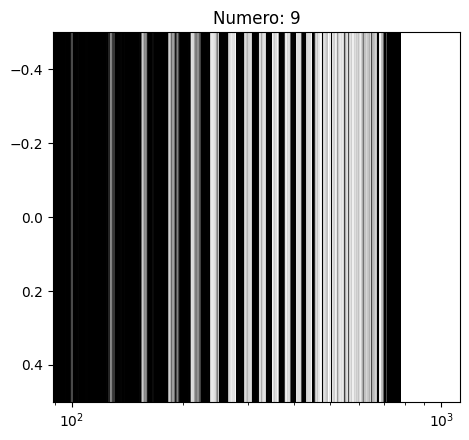

In [13]:
# Alumno: ¿Cómo se ve ahora nuestra primera imagen?

fig = plt.figure()
ax = fig.add_subplot()

ax.imshow(X_train[0].reshape(-1,1).T, cmap='gray')

ax.set_xscale('log')

plt.title('Numero: ' + str(data_y_train[0]))

plt.show()


In [14]:
print('Datos en observacion:', X_train.shape)

Datos en observacion: (60000, 784)


Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [15]:
print('Dimensión de cada imagen faltten:', X_train[0].shape)

Dimensión de cada imagen faltten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [16]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test

y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)

In [17]:
# input shape
in_shape = X_train.shape[1]
in_shape

784

In [18]:
# output shape
out_shape = y_train.shape[1]
out_shape

10

In [19]:
from keras.layers import Dense, Dropout

# Alumno, crear un modelo con la cantidad de capas ocultas que crea
# mejor sin regularizacion

model = Sequential()

model.add(Dense(units=128, activation='relu', input_shape=(in_shape,)))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 14s 11ms/step - loss: 0.5877 - accuracy: 0.7969 - val_loss: 0.4458 - val_accuracy: 0.8386
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4058 - accuracy: 0.8563 - val_loss: 0.3868 - val_accuracy: 0.8617
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3602 - accuracy: 0.8697 - val_loss: 0.3623 - val_accuracy: 0.8702
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3353 - accuracy: 0.8765 - val_loss: 0.3588 - val_accuracy: 0.8743
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3141 - accuracy: 0.8850 - val_loss: 0.3290 - val_accuracy: 0.8836
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2995 - accuracy: 0.8882 - val_loss: 0.3348 - val_accuracy: 0.8796
Epoch 7/10
375/375 [==============================] - 2s 7ms/step - loss: 0.2853 - accuracy: 0.8944 - val_loss: 0.3443 - val_accuracy: 0.8762
Epoc

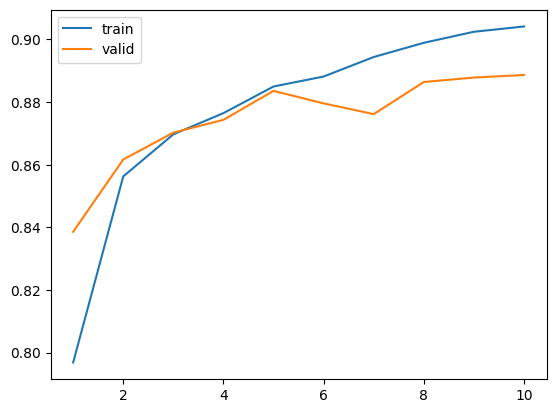

In [21]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [22]:
# Alumno: Tome el modelo anterior y agregue regularización
model = Sequential()

# Seleccione el dropout_ratev que mejor le funcione
dropout_rate = 0.2

model.add(Dense(units=128, activation='relu', input_shape=(in_shape,)))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111

In [23]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 4s 5ms/step - loss: 0.8040 - accuracy: 0.7173 - val_loss: 0.4715 - val_accuracy: 0.8295
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.5049 - accuracy: 0.8247 - val_loss: 0.4062 - val_accuracy: 0.8545
Epoch 3/10
375/375 [==============================] - 2s 7ms/step - loss: 0.4413 - accuracy: 0.8466 - val_loss: 0.4022 - val_accuracy: 0.8570
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4067 - accuracy: 0.8570 - val_loss: 0.3688 - val_accuracy: 0.8683
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3851 - accuracy: 0.8651 - val_loss: 0.3615 - val_accuracy: 0.8693
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3640 - accuracy: 0.8717 - val_loss: 0.3470 - val_accuracy: 0.8770
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3520 - accuracy: 0.8764 - val_loss: 0.3393 - val_accuracy: 0.8773
Epoch 

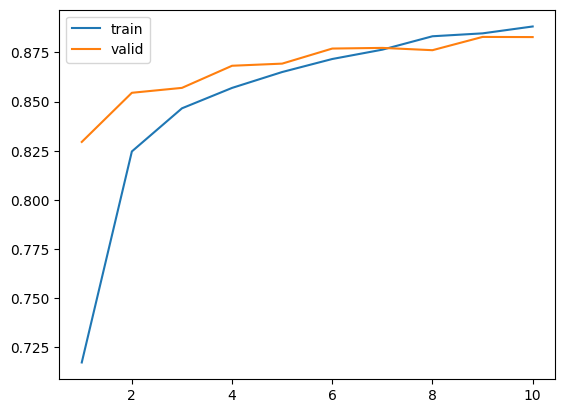

In [24]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [25]:
# Alumno: Predecir las probabilidades del dataset X_test

y_hat_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [26]:
# Alumno: Transformar las probabilidades en y_hat usando argmax

y_hat = np.argmax(y_hat_prob, axis=1)
y_hat

array([9, 2, 1, ..., 8, 1, 5])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [27]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)

scores = model.evaluate(X_test, y_test)
scores[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.3607 - accuracy: 0.8744


0.8744000196456909

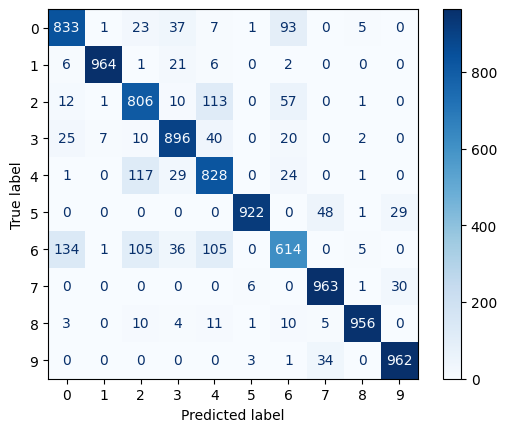

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat) # el y_test.argmax(axis=1) es porque tengo el y y_test esta en onehotercode por que le aplique el to_categorical [0,0,0,1,0,0,0,0,0,0]
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [29]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [66]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco
X_test_saco = X_test[rank_saco]

y_test_saco = y_test[rank_saco]

print(X_test_saco)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [47]:
# Alumno: Calcular la exactitud de los sacos seleccionados
score = model.evaluate(X_test_saco, y_test_saco)
score[0]

1/1 [==============================] - 0s 53ms/step - loss: 2.6784 - accuracy: 0.0000e+00
esto 0.0


In [37]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)

y_hat = model.predict(X_test_saco).argmax(axis=1)
y_hat

1/1 [==============================] - 0s 38ms/step


array([2, 2, 2, 6, 2, 2, 2, 2, 2, 2])

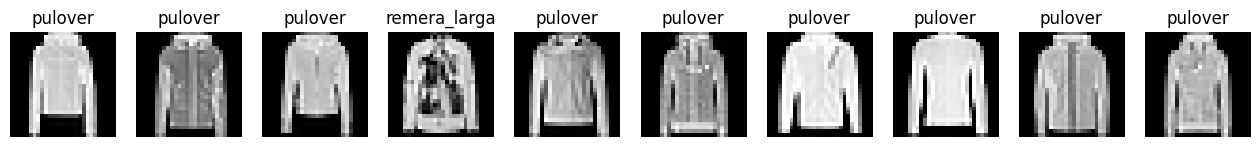

In [77]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría

fig = plt.figure(figsize=(16,9))
j=0
for i in range (len(y_hat)):
  ax = fig.add_subplot(1, 10, i+1)
  test = rank_saco[j]
  ax.imshow(data_X_test[test], cmap='gray')
  ax.set_title(category_list[y_hat[i]])
  ax.axis('off')
  j+=1
  i+=1

plt.show()

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Al utilizar deep larning no es posible diferenciar bien entre los sacos y los puloveres, el modelo es incapaz de ver los botones o los cierres que son la clave para diferenciarlos. Una alternativa es probar con redes más aptas para detección de imagenes (las CNN convolucionales, que veremos más adelante)